Question: Can We classify the gender of the penguins using only physical characteristics?

### Libraries Used

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_classif

%matplotlib inline
sns.set(style="darkgrid")

#### Importing Data

In [2]:
df = pd.read_csv(f'/home/kaykebk/Downloads/penguins_size.csv')

#### Showing data characteristics

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

Here we can see how the columns are disposed, their types and quantity of data in it.

There are some null values in the following columns: culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g and sex. Where sex being the column with most null values. 

Thus, we're going to fill those null values using simple imputer. But before it, we're going to transform sex into 0 and 1, where 1 is Female and 0 is Male.

In [5]:
df['sex'] = df['sex'].map({'MALE': 0, 'FEMALE': 1})

In [6]:
imputer = SimpleImputer(strategy='most_frequent')

df.iloc[:,:] = imputer.fit_transform(df)

df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [7]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344.000000,344.000000,344.000000,344.000000,344.000000
mean,43.905523,17.150291,200.851744,4199.418605,0.479651
std,5.447882,1.969061,14.045266,800.197923,0.500313
min,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,39.275000,15.600000,190.000000,3550.000000,0.000000
50%,44.250000,17.300000,197.000000,4025.000000,0.000000
75%,48.500000,18.700000,213.000000,4750.000000,1.000000
max,59.600000,21.500000,231.000000,6300.000000,1.000000


In the describe section of numeric features we can see the mean, standard deviation, min, max and the quantiles.

culmen_length_mm: here we can see that the min, max and mean length are 31.1mm, 59.6mm and 43.9mm respectively. The standard deviation is 5.45mm.

culmen_depth_mm: the min, max and mean culmen depth are 13.1mm, 21.4mm and 17.1mm respectively. The standard deviation is 1.96mm.

flipper_length_mm: the min, max and mean flipper length respectively are 172.0mm, 231.0mm and 200.8mm. The standard deviation is 14.04mm.

body_mass_g: here we can see that the min, max and mean length are 2700.0g, 6300.0g and 4199.4 respectively. The standard deviation is 800.2g.

Since we transformed sex into 0 and 1, these measures isn't applicable. However, we can see that probably, the quantity of both genders is close to equal.

We can theorize that the data might be close to a normal distribuition, thing that we going to see in the histograms section.

In [8]:
df.describe(include=object)

,species,island
count,344,344
unique,3,3
top,Adelie,Biscoe
freq,152,168


Here we can see the unique string values, aswell the most frequent species, sex and island.

We can conclude that the most frequent species is Adelie and the most frequent island is Biscoe.

### Data Analysis and Visualization

In this section we're going to explore the dataset and show how the data are distributed via barplot, histogram and the disposition of the numeric features per species and sex.

#### Barplot

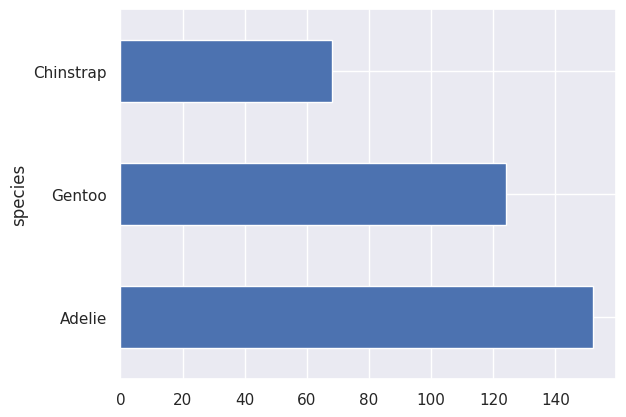

In [9]:
df['species'].value_counts().plot(kind='barh')

plt.show()

This graph shows that the most present species in our base is Adelie. As we've seen in the previous section.

#### Histograms

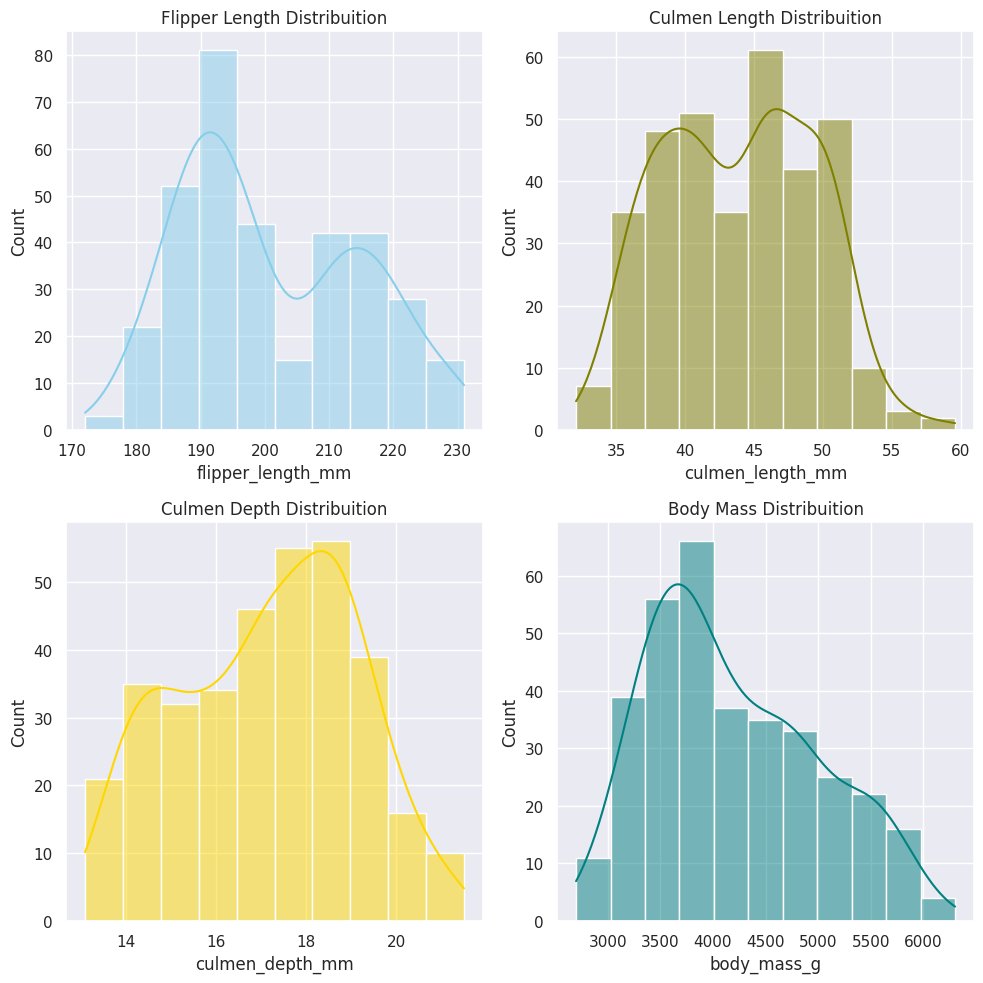

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
sns.histplot(data=df, x='flipper_length_mm', kde=True, color="skyblue", ax=axs[0, 0])
axs[0, 0].set_title('Flipper Length Distribuition')
sns.histplot(data=df, x='culmen_length_mm', kde=True, color="olive", ax=axs[0, 1])
axs[0, 1].set_title('Culmen Length Distribuition')
sns.histplot(data=df, x='culmen_depth_mm', kde=True, color="gold", ax=axs[1, 0])
axs[1, 0].set_title('Culmen Depth Distribuition')
sns.histplot(data=df, x='body_mass_g', kde=True, color="teal", ax=axs[1, 1])
axs[1, 1].set_title('Body Mass Distribuition')

plt.tight_layout()

plt.show()

Here we can see how the data are distributed between the features.

Flipper Length: The distribuition shows that possibly are three different groups of penguins with distinct flipper length.

Culmen Length: The distribuition shows that probably are 2 distinct groups of penguins with different culmen lengths.

Culmen Depth: Shows basically the same of Culmen Length, but less pronounced than lenght.

Body Mass: Shows that the majority of penguins weight are between 3500g and 4500g.

#### Box Plots

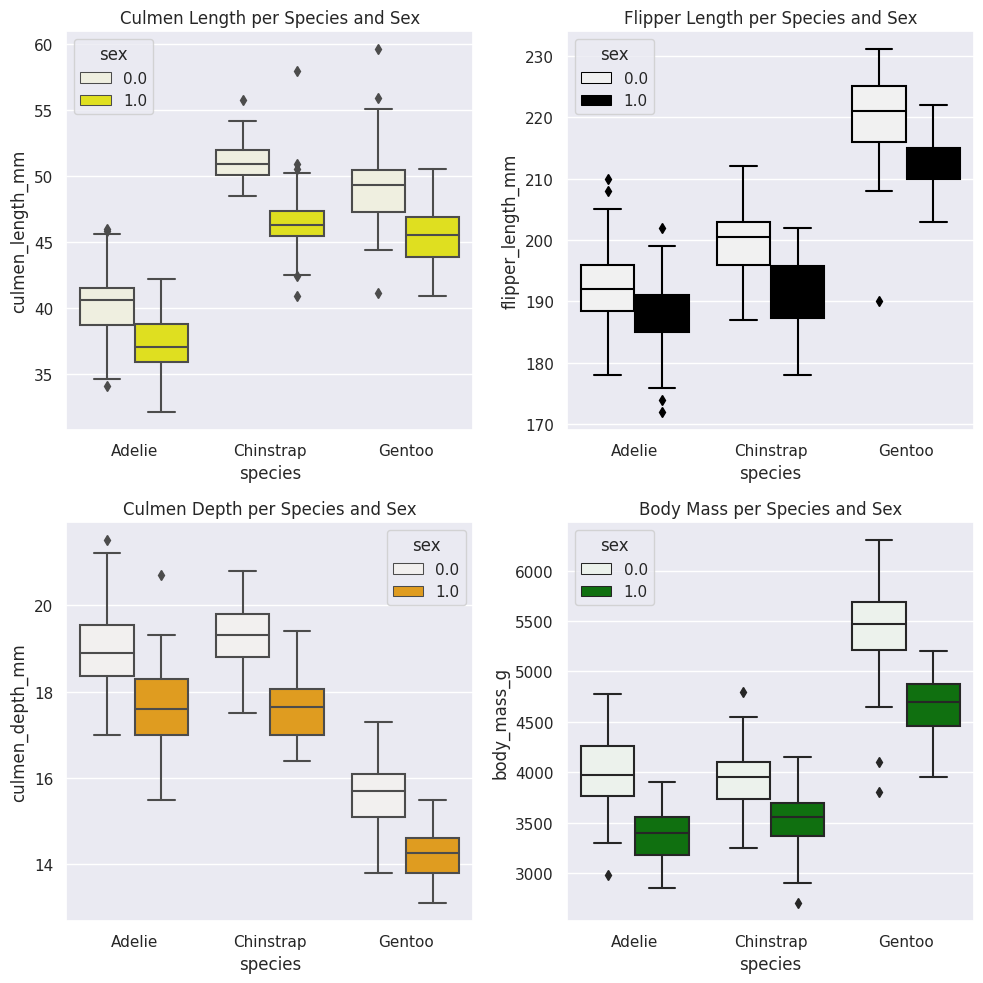

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
sns.boxplot(data=df, y='culmen_length_mm', x='species', hue='sex', ax=axs[0, 0], color='yellow')
axs[0, 0].set_title('Culmen Length per Species and Sex')
sns.boxplot(data=df, y='flipper_length_mm', x='species', hue='sex', ax=axs[0, 1], color='black')
axs[0, 1].set_title('Flipper Length per Species and Sex')
sns.boxplot(data=df, y='culmen_depth_mm', x='species', hue='sex', ax=axs[1, 0], color='orange')
axs[1, 0].set_title('Culmen Depth per Species and Sex')
sns.boxplot(data=df, y='body_mass_g', x='species', hue='sex', ax=axs[1, 1], color='green')
axs[1, 1].set_title('Body Mass per Species and Sex')

plt.tight_layout()

plt.show()

A more detailed vision of penguins features by species and sex can be seen in the graphics above.


Length and Depth of Culmen per Species and Sex:

Gentoo penguins tend to have a shorter culmen, while Chinstrap penguins have a longer culmen.
Culmen depth is relatively similar across species, but Adelie penguins appear to have a slightly lower median.
In general, male penguins have slightly larger culmens than females.

Flipper Length and Body Mass by Species and Sex:

Penguins of the Gentoo species have longer flippers and are heavier compared to the other species.
Across all species, male penguins tend to be heavier and have longer flippers than females.

After we see this graphs, we can conclude that: penguins appears to have sexual dimorphism and the Adelie and Chinstrap species appears to be very similar in the characteristics addressed in this dataset.

### Heatmap and Feature Selection

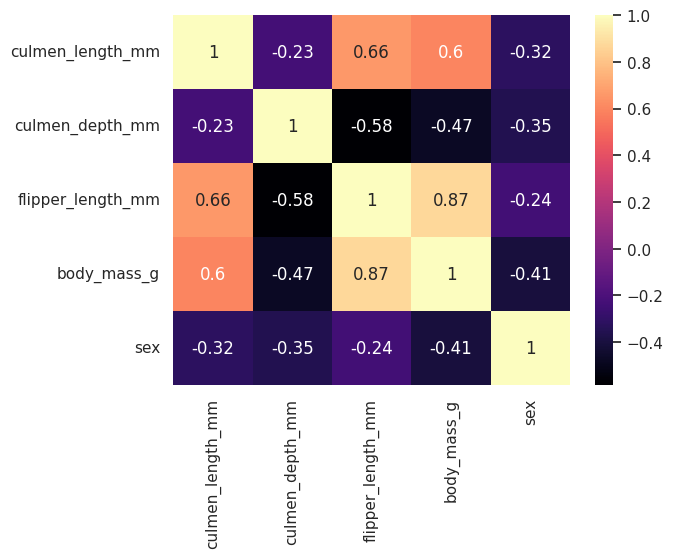

In [12]:
sns.heatmap(df.corr(numeric_only=True), cmap='magma', annot=True)

plt.show()

Here we can see that are high correlation between flipper length and body mass. However, let's use some feature selection to see if they're the best features to predict sex.

For this, we'll be using SelectKBest to extract the best features for our classification task. I've chosen this one since it's most popular and create a rank of features based on k highest score. https://towardsdev.com/the-most-used-feature-selection-methods-c117273759f8

In [13]:
X = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].values
y = df['sex'].values

df_features = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]

selection_params = {"score_func": f_classif, "k": 2}
selection = SelectKBest(**selection_params).fit(X,y)
X_new = selection.transform(X)
mask = selection.get_support()
features = df_features.iloc[:,mask].columns

print(f"Feature Names: {features}")

Feature Names: Index(['culmen_depth_mm', 'body_mass_g'], dtype='object')


Altough the most correlation is between body_mass_g and flipper_length_mm, the feature selection returned to us that the best features to predict sex is culmen_depth_mm and body_mass_g.

Therefore I'll be using them.

### Testing Multiple Classifiers

Splitting data into train and test dataset

I'm using multiple classifiers to see how they perform into this binary classification task.

SVM: The SVM Algorithm is largely used in binary classification, specially in NLP tasks. I've chosen this algorithm because of how it works, taking te binary data and seaching for the best hyperplane to segment the data. https://www.ibm.com/docs/en/spss-modeler/saas?topic=models-how-svm-works

Naive Bayes: The Naive Bayes Classifier, like the previous classifier, are commonly used in NLP tasks. I've chosen him because of how good he normally perform with short datasets. https://medium.com/analytics-vidhya/na%C3%AFve-bayes-algorithm-5bf31e9032a2#:~:text=Naive%20Bayes%20is%20a%20classification,one%20with%20the%20highest%20probability.

Random Forest: Random Forest is a widely used classification algorithm for diverse tasks. I've chosen this one because of the strategy it uses, mittigating overffiting by combining the outputs oh multiple decision trees. https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/

Ada Boost: Adaptive Boost algorithm was chosen because it works like Random Forest, using multiple decision trees output for getting a more optmized result.  However, he works by giving equal weights to the data entries. It then assigns higher weights features that are wrongly classified. Now all the features with higher weights are given more importance in the next model. It will keep training models until and unless a lower error is received. https://www.analyticsvidhya.com/blog/2021/09/adaboost-algorithm-a-complete-guide-for-beginners/

Gradient Boosting: Gradient boosting relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error. The key idea of the algorithm is to set the target outcomes for this next model in order to minimize the error. The target outcome for each case in the data depends on how much changing that case's prediction impacts the overall prediction error. The choice on this is for comparisson with other ensemble classifiers. https://www.analyticsvidhya.com/blog/2021/09/gradient-boosting-algorithm-a-complete-guide-for-beginners/

Decision Tree: The objective of Decision Tree is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. And I've chosen this because the problem I'm forward to resolve fits very well. https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/#:~:text=A%20decision%20tree%20is%20a,easy%2Dto%2Dunderstand%20models.

In [14]:
train, test = train_test_split(df, test_size=0.3, random_state=42)

In [15]:
train_X = train[features.tolist()]
train_y = train['sex']

test_X = test[features.tolist()]
test_y = test['sex']

#### SVM

In [16]:
model = SVC(random_state=42)
model.fit(train_X, train_y)
prediction = model.predict(test_X)

print('\t  Classification Report of SVM: \n')
print(classification_report(test_y, prediction))

	  Classification Report of SVM: 

              precision    recall  f1-score   support

         0.0       0.75      0.69      0.72        55
         1.0       0.68      0.73      0.71        49

    accuracy                           0.71       104
   macro avg       0.71      0.71      0.71       104
weighted avg       0.71      0.71      0.71       104



#### Naive Bayes

In [17]:
model = GaussianNB()
model.fit(train_X, train_y)
prediction = model.predict(test_X)

print('\t  Classification Report of Naive Bayes: \n')
print(classification_report(test_y, prediction))

	  Classification Report of Naive Bayes: 

              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89        55
         1.0       0.89      0.86      0.88        49

    accuracy                           0.88       104
   macro avg       0.89      0.88      0.88       104
weighted avg       0.88      0.88      0.88       104



#### Random Forest

In [18]:
model = RandomForestClassifier(random_state=42)
model.fit(train_X, train_y)
prediction = model.predict(test_X)

print('\t  Classification Report of Random Forest: \n')
print(classification_report(test_y, prediction))

	  Classification Report of Random Forest: 

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.88        55
         1.0       0.88      0.86      0.87        49

    accuracy                           0.88       104
   macro avg       0.88      0.87      0.87       104
weighted avg       0.88      0.88      0.87       104



#### Ada Boost

In [19]:
model = AdaBoostClassifier(random_state=42)
model.fit(train_X, train_y)
prediction = model.predict(test_X)

print('\t  Classification Report of Gradient Boosting: \n')
print(classification_report(test_y, prediction))

	  Classification Report of Gradient Boosting: 

              precision    recall  f1-score   support

         0.0       0.87      0.82      0.84        55
         1.0       0.81      0.86      0.83        49

    accuracy                           0.84       104
   macro avg       0.84      0.84      0.84       104
weighted avg       0.84      0.84      0.84       104



#### Gradient Boosting

In [20]:
model = GradientBoostingClassifier(random_state=42)
model.fit(train_X, train_y)
prediction = model.predict(test_X)

print('\t  Classification Report of Gradient Boosting: \n')
print(classification_report(test_y, prediction))

	  Classification Report of Gradient Boosting: 

              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84        55
         1.0       0.82      0.82      0.82        49

    accuracy                           0.83       104
   macro avg       0.83      0.83      0.83       104
weighted avg       0.83      0.83      0.83       104



#### Decision Tree

In [21]:
model = DecisionTreeClassifier(random_state=42)
model.fit(train_X, train_y)
prediction = model.predict(test_X)

print('\t  Classification Report of Decision Tree: \n')
print(classification_report(test_y, prediction))

	  Classification Report of Decision Tree: 

              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85        55
         1.0       0.84      0.84      0.84        49

    accuracy                           0.85       104
   macro avg       0.85      0.85      0.85       104
weighted avg       0.85      0.85      0.85       104



### Results

As it can be seen, Naïve Bayes was the most accurate in the sex prediction task, mainly because of how it works, using the Bayesian Theorem calculating the probability of each class and then picking the one with the highest probability. However, we can see that the other classificators had a similar result, except for the SVM.
In addition, we can conclude that it's possible to predict penguins gender based on their weight and culmen depth. 

I want to thank you for your time seeing this simple study, it's my first public study and I know there is some errors or inconsistencies, I would appreciate any advice or correction. 